In [1]:
#important imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
#nlp downloads for data preprocessing
import nltk
import os

# Set the custom download path for NLTK data in Colab
custom_download_path = '/content/nltk_data'

# Make sure the directory exists; if not, create it
os.makedirs(custom_download_path, exist_ok=True)

# Append the custom download path to NLTK data path
nltk.data.path.append(custom_download_path)

# Download NLTK resources to the custom path
nltk.download('punkt', download_dir=custom_download_path)
nltk.download('stopwords', download_dir=custom_download_path)
nltk.download('wordnet', download_dir=custom_download_path)

[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /content/nltk_data...


True

In [3]:
# Filepaths
description_path = "/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/description.txt"
test_data_path = "/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt"
test_data_sol_path = "/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt"
train_data_path = "/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt"

In [4]:
#Reading Description for data understanding

# Check if the file exists
if os.path.exists(description_path):
    # Open and read the file
    with open(description_path, 'r') as file:
        text_content = file.read()

    # Close the file
    file.close()

    # Print the content
    print(text_content)
else:
    print("The specified file does not exist.")


Train data:
ID ::: TITLE ::: GENRE ::: DESCRIPTION
ID ::: TITLE ::: GENRE ::: DESCRIPTION
ID ::: TITLE ::: GENRE ::: DESCRIPTION
ID ::: TITLE ::: GENRE ::: DESCRIPTION

Test data:
ID ::: TITLE ::: DESCRIPTION
ID ::: TITLE ::: DESCRIPTION
ID ::: TITLE ::: DESCRIPTION
ID ::: TITLE ::: DESCRIPTION

Source:
ftp://ftp.fu-berlin.de/pub/misc/movies/database/


In [5]:
## View train data
train_data = pd.read_csv(train_data_path,sep=':::', header=None, engine='python',names=['Id','Title', 'Genre', 'Description'] ,nrows=6000)
 
print("shape",train_data.shape)

print(train_data.info())
print(type(train_data))
train_data.head()

shape (6000, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           6000 non-null   int64 
 1   Title        6000 non-null   object
 2   Genre        6000 non-null   object
 3   Description  6000 non-null   object
dtypes: int64(1), object(3)
memory usage: 187.6+ KB
None
<class 'pandas.core.frame.DataFrame'>


,Id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [6]:
## View test data
test_data = pd.read_csv(test_data_path,sep=':::', header=None, engine='python')
 
print("shape",test_data.shape)
# Give columns comprehensive names
test_data.columns = ['Id','Title','Description']

print(test_data.info())
print(type(test_data))
test_data.head()

shape (54200, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None
<class 'pandas.core.frame.DataFrame'>


,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [7]:
#Data Preprocessing 
#Remove Nulls and Duplicates
train_data.dropna( inplace = True ) ## Will drop any null row if exists 
train_data.drop_duplicates(inplace = True)  ## Will drop any duplicates
train_data.shape

(6000, 4)

In [8]:
stopword = set(stopwords.words('english'))

def preprocessing(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation using regular expressions
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove specific characters #, @, and $
    text = re.sub(r'[#@\$]', '', text)
    
    # tokenize and convert to list
    tokens = word_tokenize(text)
    
    ## Lemmatize it 
    lemmatizer  = WordNetLemmatizer()
    
    ## lemmatize each token
   # text = [lemmatizer.lemmatize(token) for token in tokens]
    text = text.split()
    
    text = [word for word in text if word not in stopword]
    
    
    return " ".join(text)

In [9]:
## Create list of words in discription column
train_data["Description_clean"] =  train_data["Description"].apply(preprocessing)
test_data["Description_clean"] =  test_data["Description"].apply(preprocessing)

In [10]:
train_data.head()

,Id,Title,Genre,Description,Description_clean
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...


In [11]:
test_data.head()

,Id,Title,Description,Description_clean
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",lr brane loves life car apartment job especial...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march 1964 quico naughty child three bel...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died hasnt spoken brother 10 years seri...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...


In [12]:
train_data['Genre'].value_counts()

Genre
 drama           1481
 documentary     1459
 comedy           830
 short            559
 horror           235
 thriller         211
 action           146
 western          116
 reality-tv       100
 family            82
 adventure         82
 sci-fi            79
 music             75
 adult             73
 romance           58
 animation         54
 sport             51
 crime             48
 talk-show         41
 mystery           37
 biography         36
 fantasy           35
 musical           29
 history           27
 game-show         25
 news              18
 war               13
Name: count, dtype: int64

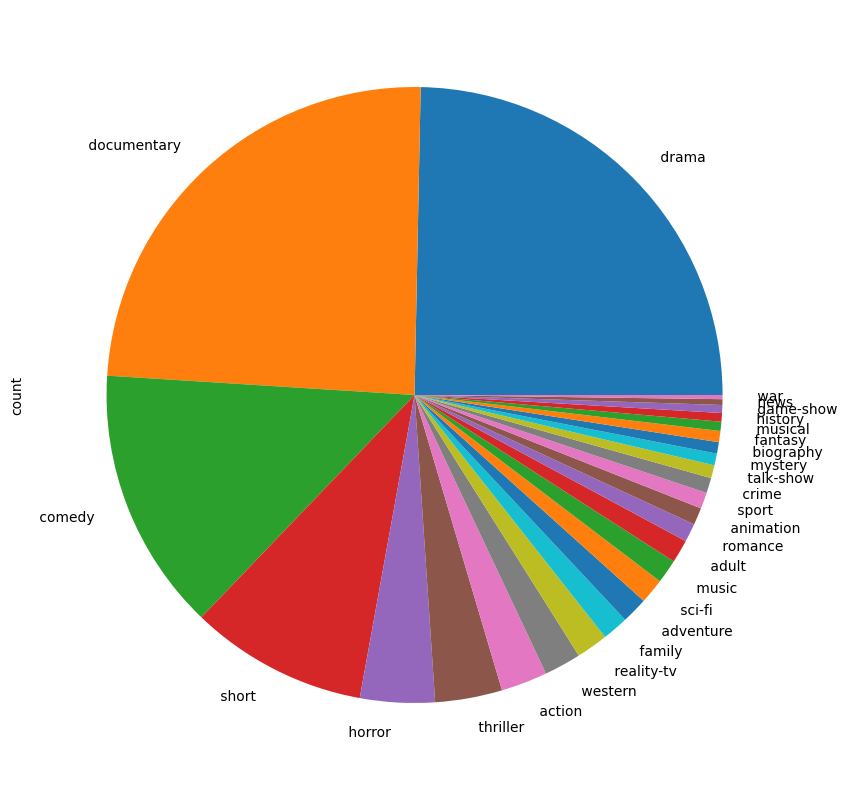

In [13]:
# visualize label counts
train_data['Genre'].value_counts().plot(kind='pie', figsize=(10,10));

In [14]:
drop_data = train_data.drop(["Id"] , axis = 1) # will drop column 
drop_data.head()

,Title,Genre,Description,Description_clean
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...


In [15]:
#Using Naive Bayes' Multinomial
#necessary libraries for Model Selection and Training

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [16]:
#Convert sentiment labels to numerical values for modeling
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
drop_data['Genre_encoded'] = label_encoder.fit_transform(drop_data['Genre'])
drop_data['Genre_encoded']

class_names= list(label_encoder.classes_)
class_names   

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

In [17]:
drop_data.head()

,Title,Genre,Description,Description_clean,Genre_encoded
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...,8
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...,24
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...,1
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...,8
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...,8


In [18]:
## Split the data
x = drop_data["Description_clean"]
y = drop_data["Genre"]

x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.2)

In [19]:
#Model training using CountVectorizer technique
vectorize = CountVectorizer()
x_train1 = vectorize.fit_transform(x_train)
x_test1 =  vectorize.transform(x_test)

Model Score on Training data 0.7547916666666666
Model Score on Training data 0.4691666666666667
               precision    recall  f1-score   support

      action        0.00      0.00      0.00         0
       adult        0.00      0.00      0.00         0
   adventure        0.00      0.00      0.00         0
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         0
      comedy        0.25      0.43      0.32        95
       crime        0.00      0.00      0.00         0
 documentary        0.88      0.54      0.67       454
       drama        0.82      0.42      0.56       636
      family        0.00      0.00      0.00         0
     fantasy        0.00      0.00      0.00         0
   game-show        0.00      0.00      0.00         0
     history        0.00      0.00      0.00         0
      horror        0.00      0.00      0.00         0
       music        0.00      0.00      0.00         0
     musical        0.0

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


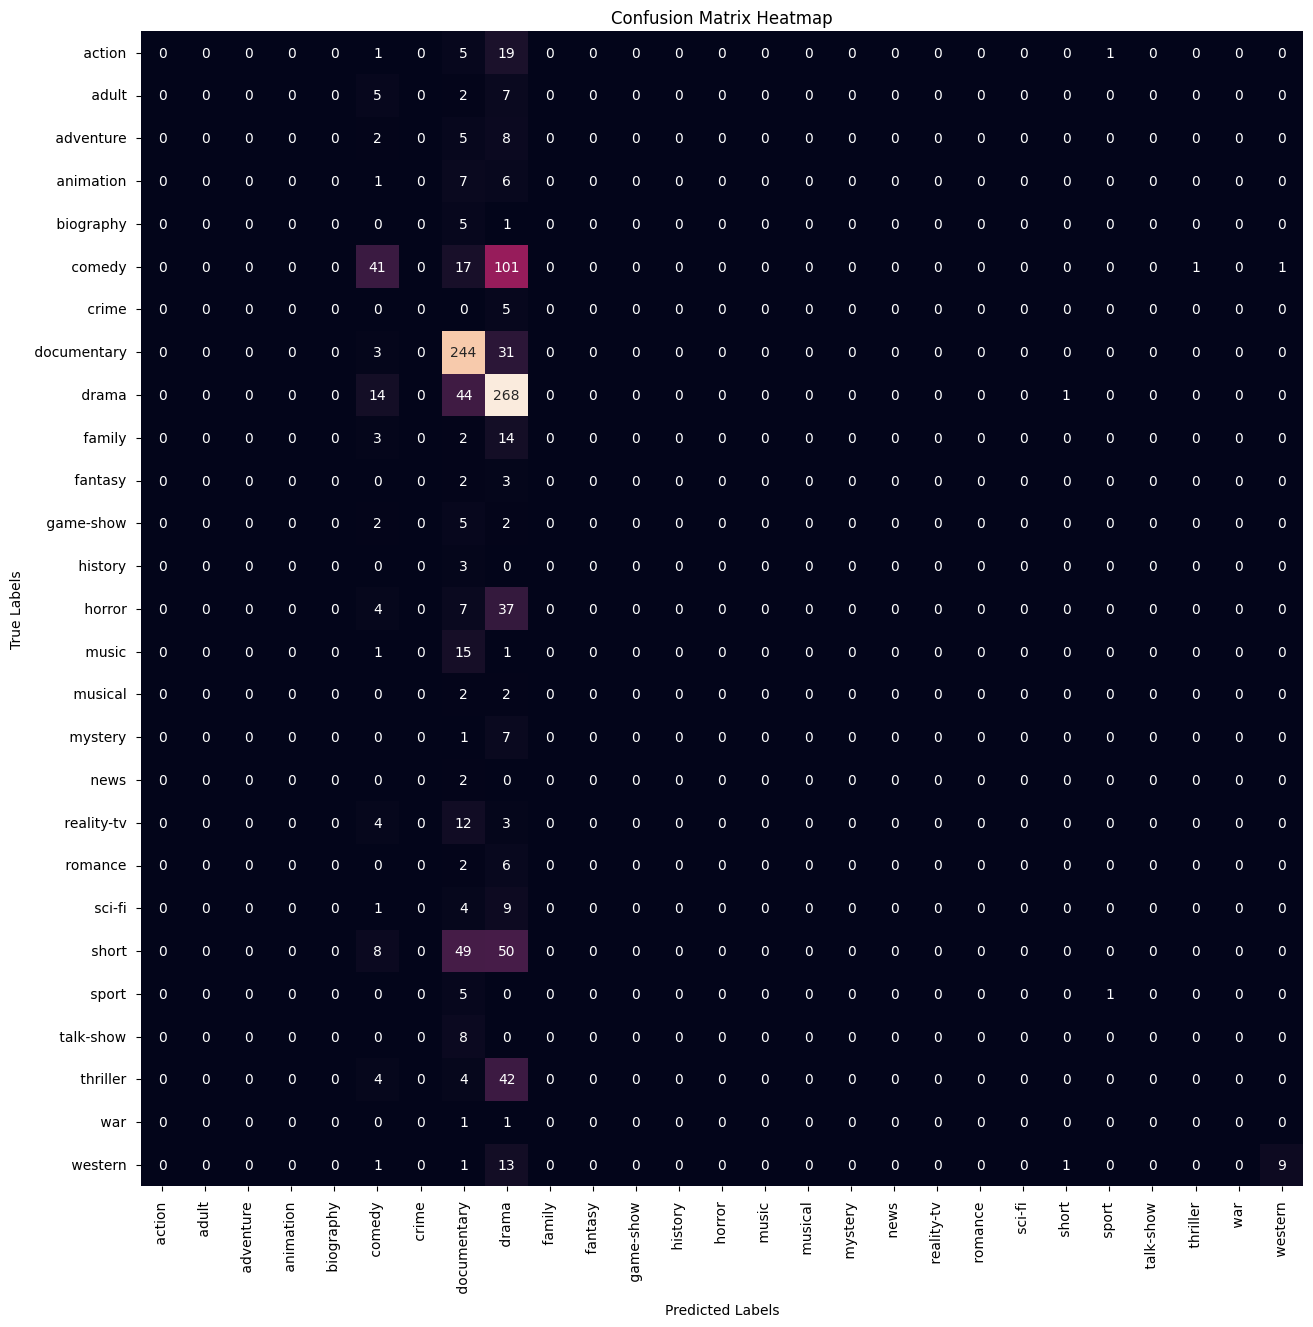

In [20]:
mnb = MultinomialNB()
mnb.fit(x_train1 ,y_train)
print("Model Score on Training data",mnb.score(x_train1 ,y_train))
print("Model Score on Training data",mnb.score(x_test1 ,y_test))
y_pred = mnb.predict(x_test1)

print(classification_report(y_pred ,y_test))
 
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show() 

In [21]:
v = TfidfVectorizer()
transformed_output=v.fit_transform(train_data['Description_clean'])

In [22]:
y=train_data["Genre"]
X=transformed_output
X_train, X_test, y_train,y_test = train_test_split(
X,y,test_size=0.2,random_state=1)

In [23]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [24]:
from sklearn.metrics import accuracy_score
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)
# Transforming numerical labels back to genres
#y_pred_train_genre = label_encoder.inverse_transform(y_pred_train_lr)
#y_pred_train_genre = label_encoder.inverse_transform(y_pred_test_lr)

accuracy_train_lr=accuracy_score(y_train,y_pred_train_lr)
accuracy_test_lr=accuracy_score(y_test,y_pred_test_lr)
print(f"Accuracy of train : {accuracy_train_lr}")
print(f"Accuracy of test : {accuracy_test_lr}")

Accuracy of train : 0.6733333333333333
Accuracy of test : 0.4825
